### 1.Importing Packages

In [1]:
import os
import re
import sys
sys.path.append('../')
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from datetime import datetime
from src.utils import session_indentifier
from src.build_features import build_features
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
# plot settings
plt.rcParams["figure.figsize"] = (8, 6)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
sns.set_style('darkgrid')
pd.set_option('display.max_colwidth', 300)
font = {'size'   : 10}

plt.rc('font', **font)

### 2. Reading the data

In [3]:
df = pd.read_csv("../input/processed_output_log.csv")

In [4]:
df.head(3)

,ip,time,method,path,status_code,response_length,user_agent,response_time,browser,os,is_mobile,is_pc,is_bot
0,207.213.193.143,2021-05-12 05:06:00+04:30,Get,cdn/profiles/1026106239,304,0,Googlebot-Image/1.0,32.00,Googlebot-Image,Other,False,False,True
1,207.213.193.143,2021-05-12 05:06:00+04:30,Get,images/badge.png,304,0,Googlebot-Image/1.0,4.00,Googlebot-Image,Other,False,False,True
2,35.110.222.153,2021-05-12 05:06:00+04:30,Get,pages/630180847,200,52567,"Mozilla/5.0 (Linux; Android 6.0.1; SAMSUNG SM-J710GN Build/MMB29K) AppleWebKit/537.36 (KHTML, like Gecko) SamsungBrowser/4.0 Chrome/44.0.2403.133 Mobile Safari/537.36",32.00,Samsung Internet,Android,True,False,False


In [5]:
df.shape

(1241944, 13)

### 3.Identifying sessions and building features

In [6]:
df["session"] = session_indentifier(df)

In [7]:
user_session = build_features(df)

In [8]:
user_session.head(3)

,,,num_requests,img_to_req(%),4xx(%),Head(%),std_path_length,consq_rep_path(%),ave_response_len,sum_response_len,ave_response_time,sum_response_time,session_duration,ave_time_per_page,robot_txt,is_bot
ip,user_agent,session,,,,,,,,,,,,,,
1.81.122.235,"Mozilla/5.0 (iPhone; CPU iPhone OS 14_6 like Mac OS X) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/14.1.1 Mobile/15E148 Safari/604.1",0,7,0.00,0.00,0.00,0.00,85.71,108702.71,760919,41.71,292.00,6.90,1.15,0,0
10.92.2.8,"Mozilla/5.0 (Linux; Android 6.0.1; SAMSUNG SM-A500H) AppleWebKit/537.36 (KHTML, like Gecko) SamsungBrowser/14.0 Chrome/87.0.4280.141 Mobile Safari/537.36",0,28,28.57,0.00,0.00,0.51,71.43,48159.57,1348468,25.43,712.00,0.17,0.01,0,0
100.92.35.41,"Mozilla/5.0 (Linux; Android 9; SM-A205F) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.101 Mobile Safari/537.36",0,12,0.00,0.00,0.00,0.83,50.00,100601.42,1207217,26.33,316.00,0.22,0.02,0,0


In [9]:
user_session.loc[(slice(None),"sentry/21.4.1 (https://sentry.io)",slice(None)),"is_bot"] = 1

In [10]:
user_session.shape

(30683, 14)

In [11]:
temp = user_session.reset_index().copy()

In [12]:
temp["is_bot"] = temp["is_bot"].replace({1: "Bot", 0:"Human"})
temp["robot_txt"] = temp["robot_txt"].replace({1: "requested", 0:"Didn't request"})

In [13]:
temp.head(2)

,ip,user_agent,session,num_requests,img_to_req(%),4xx(%),Head(%),std_path_length,consq_rep_path(%),ave_response_len,sum_response_len,ave_response_time,sum_response_time,session_duration,ave_time_per_page,robot_txt,is_bot
0,1.81.122.235,"Mozilla/5.0 (iPhone; CPU iPhone OS 14_6 like Mac OS X) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/14.1.1 Mobile/15E148 Safari/604.1",0,7,0.00,0.00,0.00,0.00,85.71,108702.71,760919,41.71,292.00,6.90,1.15,Didn't request,Human
1,10.92.2.8,"Mozilla/5.0 (Linux; Android 6.0.1; SAMSUNG SM-A500H) AppleWebKit/537.36 (KHTML, like Gecko) SamsungBrowser/14.0 Chrome/87.0.4280.141 Mobile Safari/537.36",0,28,28.57,0.00,0.00,0.51,71.43,48159.57,1348468,25.43,712.00,0.17,0.01,Didn't request,Human


### 4.EDA

#### 4.1. Number of sessions requested for robots.txt file

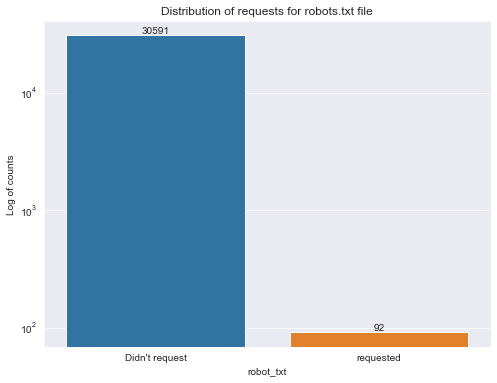

In [14]:
fig = sns.countplot(x="robot_txt", data= temp,  palette="tab10")
plt.title("Distribution of requests for robots.txt file")
plt.yscale("log")
plt.ylabel("Log of counts")

abs_values = temp['robot_txt'].value_counts(ascending=False).values
plt.bar_label(container=fig.containers[0], labels=abs_values)

plt.show()

#### 4.2. Identified sessions as bots based on known crawlers from udger.com and user-agents.net resources

In [15]:
#identify the sessions which requested for robots.txt and didn't identify as a bot
temp_user_agents = user_session.loc[(user_session["robot_txt"] == 1) & (user_session["is_bot"] == 0)]
user_agents = temp_user_agents.reset_index().loc[:,"user_agent"].tolist()

In [16]:
user_agents

['Mozilla/5.0 (Linux; Android 7.0; Moto G (4)) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/90.0.4420.0 Mobile Safari/537.36 Chrome-Lighthouse',
 'Mozilla/5.0 (Linux; Android 7.0; Moto G (4)) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/90.0.4420.0 Mobile Safari/537.36 Chrome-Lighthouse',
 'Mozilla/5.0 (iPhone; CPU iPhone OS 10_3_2 like Mac OS X) AppleWebKit/603.2.4 (KHTML, like Gecko) Version/10.0 Mobile/14F89 Safari/602.1',
 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.101 Safari/537.36',
 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.101 Safari/537.36',
 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.101 Safari/537.36',
 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.77 Safari/537.36',
 'Mozilla/5.0 (X11; Linux x86_64; rv:78.0) Gecko/20100101 Firefox/78.0',
 'Mozilla/5.0 (M

In [17]:
j = 0
for i in user_agents:
    if "AppleWebKit" in i:
        j += 1
    else:
        print(i) # print those who doesn't contain AppleWebKit
        
print("Number of user_agents: ", len(user_agents))
print("Number of user_agents with 'AppleWebkit':", j)

Mozilla/5.0 (X11; Linux x86_64; rv:78.0) Gecko/20100101 Firefox/78.0
Mozilla/5.0 (compatible; ips-agent)
Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:89.0) Gecko/20100101 Firefox/89.0
Mozilla/5.0 (Windows NT 6.1; Win64; x64; rv:89.0) Gecko/20100101 Firefox/89.0
Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:88.0) Gecko/20100101 Firefox/88.0
Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:89.0) Gecko/20100101 Firefox/89.0
Number of user_agents:  57
Number of user_agents with 'AppleWebkit': 51


In [18]:
# for those whose ("robot_txt" == 1 and "is_bot" == 0), replace their "is_bot" value with 1 (detected as a bot)
# these werent identified as bots with build_features.py, because their user agents don't contain anything related to bots!!!!

user_session.loc[(user_session["robot_txt"] == 1) & (user_session["is_bot"] == 0), "is_bot"] = 1
temp.loc[((temp["robot_txt"] == "requested") & (temp["is_bot"] == "Human")), "is_bot"] = "Bot"

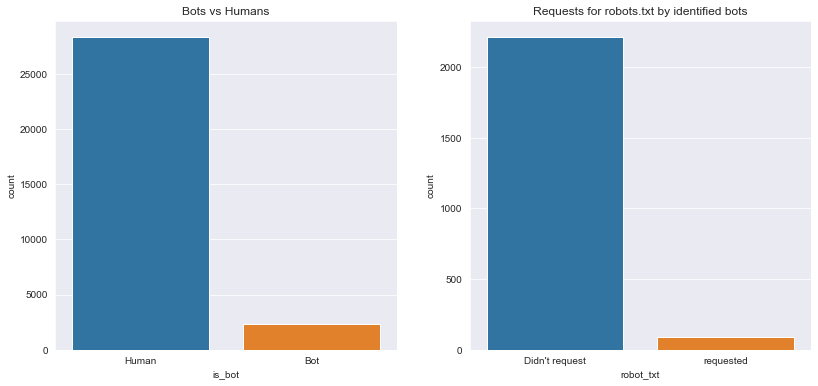

In [19]:
fig, axes = plt.subplots(1,2, figsize=(12,6))
axes = axes.ravel()

sns.countplot(x= "is_bot", data= temp,  palette="tab10", ax= axes[0])
axes[0].set_title("Bots vs Humans")

sns.countplot(x="robot_txt", data= temp[temp["is_bot"] =="Bot"],  palette="tab10", ax= axes[1])
axes[1].set_title("Requests for robots.txt by identified bots")

fig.tight_layout(pad=3)
plt.show()

#### 4.3. Statistics of the number of requests sent in each session

In [20]:
temp["num_requests"].describe(percentiles=[0.25, 0.5, 0.75, 0.8, 0.9, 0.95, 0.99])

count   30683.00
mean       38.38
std       330.53
min         6.00
25%        13.00
50%        16.00
75%        29.00
80%        34.00
90%        62.00
95%        98.00
99%       236.00
max     23912.00
Name: num_requests, dtype: float64

In [21]:
for i in [(29, "75"), (98, "95"), (236, "99")]:
    print(f"number of sessions with num_request more than {i[0]} ({i[1]}th percentile):",
          user_session[user_session["num_requests"] > i[0]].shape[0])

number of sessions with num_request more than 29 (75th percentile): 7635
number of sessions with num_request more than 98 (95th percentile): 1533
number of sessions with num_request more than 236 (99th percentile): 306


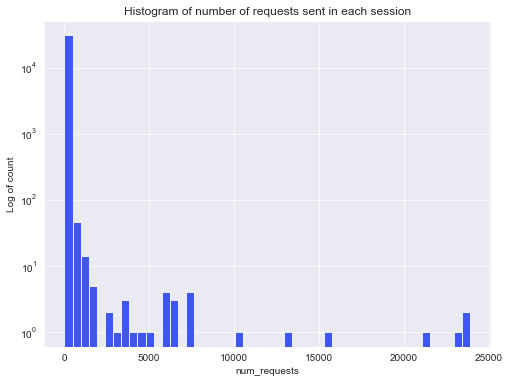

In [22]:
sns.histplot(data = user_session, x = "num_requests", bins=50, color="#0324F6")
plt.title("Histogram of number of requests sent in each session")
plt.yscale("log")
plt.ylabel("Log of count")
plt.show()

In [23]:
# all of the sessions with num_requests more than 5000
print(temp[temp["num_requests"] >= 5000].shape)
temp[temp["num_requests"] >= 5000]

# all of them are bots and none of them requested for robots.txt

(19, 17)


,ip,user_agent,session,num_requests,img_to_req(%),4xx(%),Head(%),std_path_length,consq_rep_path(%),ave_response_len,sum_response_len,ave_response_time,sum_response_time,session_duration,ave_time_per_page,robot_txt,is_bot
7345,20.116.215.189,Go-http-client/2.0,0,6401,0.00,0.00,41.70,0.49,99.95,6537.99,41849705,16.25,103996.00,602.85,0.09,Didn't request,Bot
7346,20.117.146.75,Go-http-client/2.0,0,6067,0.00,0.00,40.17,0.49,99.95,6817.45,41361477,15.97,96864.00,602.90,0.10,Didn't request,Bot
7882,20.92.247.146,sentry/21.4.1 (https://sentry.io),0,23912,0.00,0.01,0.00,0.02,99.98,918462.62,21962278192,42.33,1012232.00,599.15,0.03,Didn't request,Bot
7883,20.92.247.170,Go-http-client/2.0,0,7273,0.00,0.00,42.33,0.48,99.96,6987.06,50816897,16.68,121283.00,602.97,0.08,Didn't request,Bot
8031,207.213.193.143,Googlebot-Image/1.0,0,13313,13.26,0.00,0.00,0.34,99.89,455.46,6063491,19.05,253616.00,258.93,0.02,Didn't request,Bot
8036,207.213.193.157,Googlebot-Image/1.0,0,7609,10.53,0.00,0.00,0.30,99.83,399.64,3040856,19.90,151393.00,257.83,0.03,Didn't request,Bot
8082,207.213.207.102,Googlebot-Image/1.0,2,23623,5.09,0.00,0.00,0.22,99.94,282.75,6679421,21.14,499504.00,345.83,0.01,Didn't request,Bot
8084,207.213.207.102,"Mozilla/5.0 (Linux; Android 6.0.1; Nexus 5X Build/MMB29P) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.90 Mobile Safari/537.36 (compatible; Googlebot/2.1; +http://www.google.com/bot.html)",0,6325,0.00,0.00,0.00,0.68,98.20,96320.39,609226492,112.29,710231.00,343.97,0.05,Didn't request,Bot
8091,207.213.207.116,Googlebot-Image/1.0,1,23378,5.04,0.00,0.00,0.22,99.93,269.99,6311727,21.16,494689.00,384.40,0.02,Didn't request,Bot
8093,207.213.207.116,"Mozilla/5.0 (Linux; Android 6.0.1; Nexus 5X Build/MMB29P) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.90 Mobile Safari/537.36 (compatible; Googlebot/2.1; +http://www.google.com/bot.html)",0,6003,0.00,0.02,0.00,0.67,98.23,97074.38,582737510,110.24,661785.00,343.57,0.06,Didn't request,Bot


In [24]:
# Statistics and histogram of num_requests sent in each session based on identified bots
temp.groupby("is_bot")["num_requests"].describe(percentiles=[0.25, 0.5, 0.75, 0.8, 0.9, 0.95, 0.99])

# bots have sent higher number of requests on average.
# humans have higher num_requests for 25 till 95 percentile of the data. 

,count,mean,std,min,25%,50%,75%,80%,90%,95%,99%,max
is_bot,,,,,,,,,,,,
Bot,2309.00,133.13,1182.28,6.00,7.00,11.00,22.00,28.00,57.00,134.20,2611.64,23912.00
Human,28374.00,30.66,60.37,6.00,13.00,16.00,30.00,34.00,62.00,97.00,220.00,4541.00


In [25]:
temp[(temp["num_requests"] >= 220)].shape

(369, 17)

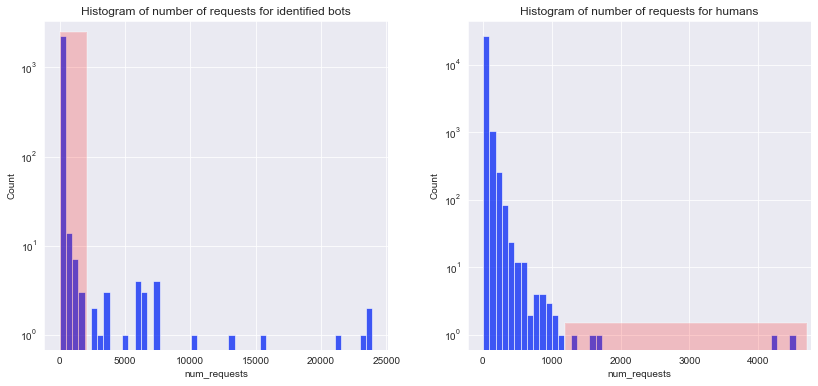

In [26]:
fig, axes = plt.subplots(1,2, figsize=(12,6))
axes = axes.ravel()

sns.histplot(data = temp[(temp["is_bot"] == "Bot")], x = "num_requests", bins=50, color="#0324F6", ax= axes[0])
axes[0].set_title("Histogram of number of requests for identified bots")
axes[0].set_yscale('log')

axes[0].add_patch(mpatches.Rectangle((-0.5,0), 2100, 2500, facecolor = "red",
                        alpha = 0.2,
                        linewidth = 2))

sns.histplot(data = temp[(temp["is_bot"] == "Human")], x = "num_requests", bins=50, color="#0324F6", ax= axes[1])
axes[1].set_title("Histogram of number of requests for humans")
axes[1].set_yscale('log')

rect=mpatches.Rectangle((1200,0),3500,1.5,
                        facecolor = "red",
                        alpha = 0.2,
                        linewidth = 2)
plt.gca().add_patch(rect)

fig.tight_layout(pad=3)
plt.show()

In [27]:
# sessions in the red region for those who identified as humans
temp[(temp["is_bot"] == "Human") & (temp["num_requests"] >= 1200)]

# their user agents contain Applewebkit.

,ip,user_agent,session,num_requests,img_to_req(%),4xx(%),Head(%),std_path_length,consq_rep_path(%),ave_response_len,sum_response_len,ave_response_time,sum_response_time,session_duration,ave_time_per_page,robot_txt,is_bot
9,102.105.139.132,"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.77 Safari/537.36",0,1686,3.97,0.06,0.00,0.63,98.58,8796.01,14830072,75446.08,127202088.00,234.97,0.14,Didn't request,Human
1076,113.32.70.122,"Mozilla/5.0 (Windows NT 6.1; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.101 Safari/537.36",0,1595,32.10,0.19,0.00,0.70,98.12,7035.98,11222384,6123.42,9766856.00,92.87,0.06,Didn't request,Human
5930,148.208.107.7,"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.101 Safari/537.36",0,4228,2.18,0.17,0.00,0.56,99.50,46564.46,196874533,77237.68,326560928.00,372.57,0.09,Didn't request,Human
5933,148.208.107.7,"Mozilla/5.0 (Windows NT 6.3; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.101 Safari/537.36",0,1313,5.86,0.08,0.00,0.67,99.01,20947.71,27504348,82024.30,107697901.00,194.70,0.15,Didn't request,Human
19080,35.26.221.84,"Mozilla/5.0 (Windows NT 6.1; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.101 Safari/537.36",0,4541,67.36,0.00,0.00,0.54,99.76,3263.74,14820639,523.49,2377175.00,9.28,0.00,Didn't request,Human


In [28]:
# bots with num_requests less than 220
temp[(temp["is_bot"] == "Bot") & (temp["num_requests"] <= 220)]

,ip,user_agent,session,num_requests,img_to_req(%),4xx(%),Head(%),std_path_length,consq_rep_path(%),ave_response_len,sum_response_len,ave_response_time,sum_response_time,session_duration,ave_time_per_page,robot_txt,is_bot
24,102.113.30.142,Go-http-client/1.1,0,7,0.00,100.00,0.00,0.00,85.71,0.00,0,8.57,60.00,0.37,0.06,Didn't request,Bot
38,102.221.167.35,okhttp/3.12.1,0,44,0.00,0.00,0.00,0.00,97.73,1767.75,77781,62347.14,2743274.00,25.17,0.59,Didn't request,Bot
53,102.29.29.19,okhttp/3.12.1,0,20,0.00,0.00,0.00,0.00,95.00,1846.15,36923,45643.00,912860.00,19.35,1.02,Didn't request,Bot
65,102.57.57.64,"Mozilla/5.0 (iPhone; CPU iPhone OS 13_6 like Mac OS X) AppleWebKit/605.1.15 (KHTML, like Gecko) GSA/161.1.375499464 Mobile/15E148 Safari/604.1",0,21,28.57,0.00,0.00,0.48,66.67,43200.57,907212,15.62,328.00,0.33,0.02,Didn't request,Bot
77,102.86.124.47,"Mozilla/5.0 (iPhone; CPU iPhone OS 14_5 like Mac OS X) AppleWebKit/605.1.15 (KHTML, like Gecko) GSA/159.1.372414826 Mobile/15E148 Safari/604.1",0,15,40.00,0.00,0.00,0.26,60.00,3453.80,51807,17.07,256.00,0.12,0.01,Didn't request,Bot
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30568,92.239.3.110,okhttp/3.12.1,0,6,0.00,0.00,0.00,0.00,83.33,10760.00,64560,70458.67,422752.00,42.93,8.59,Didn't request,Bot
30569,92.239.3.110,okhttp/3.12.1,1,9,0.00,0.00,0.00,0.00,88.89,10149.56,91346,38525.22,346727.00,34.22,4.28,Didn't request,Bot
30580,92.239.31.204,okhttp/3.12.1,0,10,0.00,0.00,0.00,0.42,70.00,27959.70,279597,64626.20,646262.00,24.58,2.73,Didn't request,Bot
30594,92.253.144.224,okhttp/3.12.1,0,14,0.00,0.00,0.00,0.00,92.86,23694.21,331719,147985.00,2071790.00,22.45,1.73,Didn't request,Bot


In [29]:
# human sessions with unusual num_requests(more tha 220)
unusual_human_num_request = temp[(temp["num_requests"] > 220) & (temp["is_bot"] == "Human")]
unusual_human_num_request

,ip,user_agent,session,num_requests,img_to_req(%),4xx(%),Head(%),std_path_length,consq_rep_path(%),ave_response_len,sum_response_len,ave_response_time,sum_response_time,session_duration,ave_time_per_page,robot_txt,is_bot
9,102.105.139.132,"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.77 Safari/537.36",0,1686,3.97,0.06,0.00,0.63,98.58,8796.01,14830072,75446.08,127202088.00,234.97,0.14,Didn't request,Human
146,107.169.198.163,"Mozilla/5.0 (Linux; Android 9; SM-J701F) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/90.0.4430.91 Mobile Safari/537.36",0,234,26.92,0.43,0.00,0.60,91.88,20988.11,4911217,3210.23,751194.00,14.33,0.06,Didn't request,Human
162,11.127.197.129,"Mozilla/5.0 (iPhone; CPU iPhone OS 14_4 like Mac OS X) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/14.0.3 Mobile/15E148 Safari/604.1",0,221,46.15,0.00,0.00,0.68,92.31,13361.15,2952815,9649.17,2132467.00,42.98,0.20,Didn't request,Human
423,113.118.124.60,"Mozilla/5.0 (Linux; Android 11; SAMSUNG SM-N975F) AppleWebKit/537.36 (KHTML, like Gecko) SamsungBrowser/14.0 Chrome/87.0.4280.141 Mobile Safari/537.36",0,298,42.95,0.00,0.00,0.65,95.30,7418.39,2210679,16679.85,4970596.00,119.78,0.40,Didn't request,Human
556,113.118.175.0,"Mozilla/5.0 (Linux; Android 11; SM-N975F) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.106 Mobile Safari/537.36",0,610,41.64,1.31,0.00,0.70,95.25,111943.72,68285671,6137.39,3743810.00,116.18,0.19,Didn't request,Human
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30106,92.130.75.67,"Mozilla/5.0 (Linux; Android 10; SM-A305F) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/89.0.4389.105 Mobile Safari/537.36",0,294,28.91,0.00,0.00,0.61,93.20,20288.74,5964891,1335.09,392517.00,38.33,0.13,Didn't request,Human
30270,92.144.232.242,"Mozilla/5.0 (Windows NT 6.3; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.77 Safari/537.36",0,272,32.35,0.37,0.00,0.65,93.38,17156.44,4666551,1145.49,311574.00,5.73,0.02,Didn't request,Human
30518,92.239.237.195,"Mozilla/5.0 (Linux; Android 10; SAMSUNG SM-A515F) AppleWebKit/537.36 (KHTML, like Gecko) SamsungBrowser/11.0 Chrome/75.0.3770.143 Mobile Safari/537.36",0,286,32.52,0.00,0.00,0.65,91.96,19293.31,5517887,1138.83,325706.00,26.45,0.09,Didn't request,Human
30523,92.239.237.207,MoziIIa/5.0 (X11; Linux x86_64) app_version: 581,4,400,0.00,0.25,0.00,0.48,99.00,334.00,133598,13.65,5460.00,113.03,0.28,Didn't request,Human


In [30]:
print(len(unusual_human_num_request))
j = 0
for i in unusual_human_num_request["user_agent"].tolist():
    if "AppleWebKit" in i:
        j += 1
    else:
        print(i)
print(j)
# 253 of 278 have Applewebkit in their user agents

278
Mozilla/5.0 (Windows NT 6.1; Win64; x64; rv:89.0) Gecko/20100101 Firefox/89.0
Mozilla/5.0 (Windows NT 6.1; rv:89.0) Gecko/20100101 Firefox/89.0
Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:89.0) Gecko/20100101 Firefox/89.0
MoziIIa/5.0 (X11; Linux x86_64) app_version: 581
Mozilla/5.0 (Windows NT 6.1; Win64; x64; rv:64.0) Gecko/20100101 Firefox/64.0
Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:88.0) Gecko/20100101 Firefox/88.0
Mozilla/5.0 (Windows NT 6.1; Win64; x64; rv:89.0) Gecko/20100101 Firefox/89.0
Mozilla/5.0 (Windows NT 6.1; Win64; x64; rv:89.0) Gecko/20100101 Firefox/89.0
Mozilla/5.0 (Windows NT 6.1; rv:88.0) Gecko/20100101 Firefox/88.0
MoziIIa/5.0 (X11; Linux x86_64) app_version: 581
Mozilla/5.0 (Android; Mobile; rv:36.0) Gecko/36.0 Firefox/36.0
MoziIIa/5.0 (X11; Linux x86_64) app_version: 581
Mozilla/5.0 (Windows NT 6.1; rv:77.0) Gecko/20100101 Firefox/77.0
Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:76.0) Gecko/20100101 Firefox/76.0
Mozilla/5.0 (X11; Ubuntu; Linux x86_64; r

In [31]:
# user agents of unusual_human_sessions
# check if any of these user agents were earlier considered as a bot or not
unusual_human_num_request[unusual_human_num_request["user_agent"].isin(user_agents)]

,ip,user_agent,session,num_requests,img_to_req(%),4xx(%),Head(%),std_path_length,consq_rep_path(%),ave_response_len,sum_response_len,ave_response_time,sum_response_time,session_duration,ave_time_per_page,robot_txt,is_bot
9,102.105.139.132,"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.77 Safari/537.36",0,1686,3.97,0.06,0.00,0.63,98.58,8796.01,14830072,75446.08,127202088.00,234.97,0.14,Didn't request,Human
908,113.135.242.41,Mozilla/5.0 (Windows NT 6.1; Win64; x64; rv:89.0) Gecko/20100101 Firefox/89.0,0,231,29.44,4.76,0.00,0.55,91.77,38118.72,8805425,5234.66,1209207.00,11.62,0.05,Didn't request,Human
1076,113.32.70.122,"Mozilla/5.0 (Windows NT 6.1; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.101 Safari/537.36",0,1595,32.10,0.19,0.00,0.70,98.12,7035.98,11222384,6123.42,9766856.00,92.87,0.06,Didn't request,Human
1077,113.32.70.122,"Mozilla/5.0 (Windows NT 6.1; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.101 Safari/537.36",1,350,29.71,0.00,0.00,0.68,96.00,9244.39,3235537,5244.95,1835732.00,31.55,0.09,Didn't request,Human
3016,14.212.130.18,"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.77 Safari/537.36",0,325,29.54,0.00,0.00,0.59,94.77,29461.46,9574973,1017.54,330700.00,5.42,0.02,Didn't request,Human
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27886,69.67.94.241,"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.77 Safari/537.36",0,301,32.89,0.00,0.00,0.64,94.35,16253.63,4892343,2136.27,643016.00,11.75,0.04,Didn't request,Human
28982,76.225.14.197,"Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.77 Safari/537.36",1,330,19.09,0.00,0.00,0.74,94.55,14464.73,4773360,42879.99,14150397.00,255.87,0.78,Didn't request,Human
29031,78.157.35.168,"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.101 Safari/537.36",0,260,30.00,0.38,0.00,0.62,91.54,26327.16,6845062,639.56,166285.00,3.12,0.01,Didn't request,Human
29150,83.18.252.82,"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.77 Safari/537.36",0,555,2.88,0.00,0.00,0.57,97.84,6578.96,3651323,62320.20,34587712.00,602.20,1.09,Didn't request,Human


<AxesSubplot:ylabel='Frequency'>

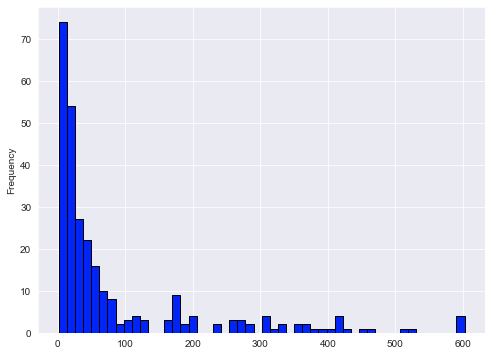

In [32]:
# histogram of session duration of unusual_human_sessions
unusual_human_num_request["session_duration"].plot(kind="hist", bins = 50, color = "#0324F6",edgecolor = "Black" )

#### 4.4. Statistics and histogram for the ratio of requested images to all requests 

In [33]:
user_session["img_to_req(%)"].describe()

count   30683.00
mean       29.72
std        16.71
min         0.00
25%        21.95
50%        33.33
75%        41.67
max       100.00
Name: img_to_req(%), dtype: float64

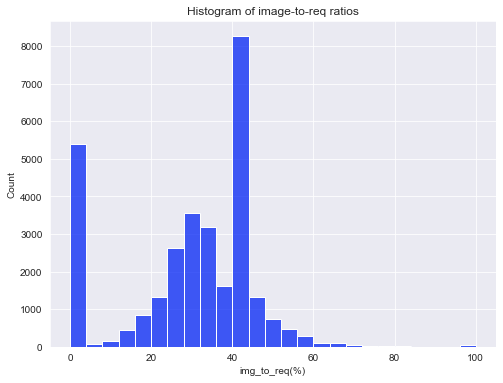

In [34]:
sns.histplot(data = user_session, x = "img_to_req(%)", bins=25, color="#0324F6")
plt.title("Histogram of image-to-req ratios")
plt.show()

In [35]:
temp[(temp["img_to_req(%)"] > 0)]["is_bot"].value_counts()

Human    24963
Bot        362
Name: is_bot, dtype: int64

In [36]:
# bots with img_to_req more than 5%
unusual_bot_img_to_req = temp[(temp["img_to_req(%)"] > 0) & (temp["is_bot"] == "Bot")]
unusual_bot_img_to_req[unusual_bot_img_to_req["user_agent"].isin(user_agents)]

,ip,user_agent,session,num_requests,img_to_req(%),4xx(%),Head(%),std_path_length,consq_rep_path(%),ave_response_len,sum_response_len,ave_response_time,sum_response_time,session_duration,ave_time_per_page,robot_txt,is_bot
129,105.167.48.81,"Mozilla/5.0 (Linux; Android 7.0; Moto G (4)) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/90.0.4420.0 Mobile Safari/537.36 Chrome-Lighthouse",0,6,16.67,16.67,0.00,1.03,33.33,9043.00,54258,16.67,100.00,0.27,0.05,requested,Bot
1811,126.76.60.39,"Mozilla/5.0 (Linux; Android 7.0; Moto G (4)) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/90.0.4420.0 Mobile Safari/537.36 Chrome-Lighthouse",0,6,16.67,16.67,0.00,1.03,33.33,9044.00,54264,14.00,84.00,0.22,0.04,requested,Bot
2369,127.227.249.136,"Mozilla/5.0 (iPhone; CPU iPhone OS 10_3_2 like Mac OS X) AppleWebKit/603.2.4 (KHTML, like Gecko) Version/10.0 Mobile/14F89 Safari/602.1",0,60,26.67,0.00,1.67,0.61,75.00,26030.60,1561836,587.38,35243.00,1.80,0.03,requested,Bot
2785,134.24.166.6,"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.101 Safari/537.36",0,86,23.26,0.00,0.00,0.58,81.40,53776.48,4624777,3260.16,280374.00,4.87,0.06,requested,Bot
3197,14.226.145.71,"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.101 Safari/537.36",0,15,26.67,13.33,0.00,2.15,73.33,9709611.67,145644175,706.93,10604.00,0.83,0.06,requested,Bot
3703,14.48.245.59,"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.101 Safari/537.36",0,233,9.44,0.00,0.00,0.71,93.13,12092.77,2817615,58770.83,13693603.00,122.57,0.53,requested,Bot
3811,14.55.88.198,"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.77 Safari/537.36",0,47,23.40,0.00,0.00,0.61,68.09,32163.83,1511700,141.11,6632.00,0.12,0.00,requested,Bot
3925,14.62.145.109,Mozilla/5.0 (X11; Linux x86_64; rv:78.0) Gecko/20100101 Firefox/78.0,0,39,25.64,2.56,0.00,0.68,58.97,39445.13,1538360,13630.36,531584.00,8.88,0.23,requested,Bot
4005,14.62.88.194,"Mozilla/5.0 (Macintosh; Intel Mac OS X 10_13_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.101 Safari/537.36",0,58,18.97,0.00,0.00,0.82,74.14,25653.76,1487918,38386.28,2226404.00,61.03,1.07,requested,Bot
5728,148.197.0.121,"Mozilla/5.0 (iPhone; CPU iPhone OS 10_3_4 like Mac OS X) AppleWebKit/603.3.8 (KHTML, like Gecko) Version/10.0 Mobile/14G61 Safari/602.1",0,67,11.94,0.00,2.99,0.57,79.10,23011.09,1541743,685.30,45915.00,1.32,0.02,requested,Bot


In [37]:
print(len(unusual_bot_img_to_req))
j = 0
for i in unusual_bot_img_to_req["user_agent"].tolist():
    if "AppleWebKit" in i:
        j += 1
    else:
        print(i)
print(j)
# 309 of 342 have applewebkit in their user agents

362
Mozilla/5.0 (X11; Linux x86_64; rv:78.0) Gecko/20100101 Firefox/78.0
AdsBot-Google (+http://www.google.com/adsbot.html)
AdsBot-Google (+http://www.google.com/adsbot.html)
AdsBot-Google (+http://www.google.com/adsbot.html)
AdsBot-Google (+http://www.google.com/adsbot.html)
AdsBot-Google (+http://www.google.com/adsbot.html)
AdsBot-Google (+http://www.google.com/adsbot.html)
AdsBot-Google (+http://www.google.com/adsbot.html)
Googlebot-Image/1.0
Googlebot-Image/1.0
Googlebot-Image/1.0
Googlebot-Image/1.0
Googlebot-Image/1.0
Googlebot-Image/1.0
Googlebot-Image/1.0
Googlebot-Image/1.0
Googlebot-Image/1.0
Googlebot-Image/1.0
Googlebot-Image/1.0
Googlebot-Image/1.0
Googlebot-Image/1.0
Googlebot-Image/1.0
Googlebot-Image/1.0
Googlebot-Image/1.0
Googlebot-Image/1.0
Googlebot-Image/1.0
Googlebot-Image/1.0
Googlebot-Image/1.0
Googlebot-Image/1.0
Googlebot-Image/1.0
Googlebot-Image/1.0
Googlebot-Image/1.0
Googlebot-Image/1.0
Googlebot-Image/1.0
Googlebot-Image/1.0
Googlebot-Image/1.0
Googlebot-

In [38]:
temp.groupby("is_bot")["img_to_req(%)"].describe()

,count,mean,std,min,25%,50%,75%,max
is_bot,,,,,,,,
Bot,2309.00,5.12,13.90,0.00,0.00,0.00,0.00,100.00
Human,28374.00,31.72,15.26,0.00,25.00,35.71,42.86,100.00


In [39]:
# Bots which all of their requests were for images!!
temp[(temp["img_to_req(%)"] == 100) & (temp["is_bot"] == "Bot")]

,ip,user_agent,session,num_requests,img_to_req(%),4xx(%),Head(%),std_path_length,consq_rep_path(%),ave_response_len,sum_response_len,ave_response_time,sum_response_time,session_duration,ave_time_per_page,robot_txt,is_bot
10235,29.240.244.96,"Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_1) AppleWebKit/601.2.4 (KHTML, like Gecko) Version/9.0.1 Safari/601.2.4 facebookexternalhit/1.1 Facebot Twitterbot/1.0",0,8,100.00,75.00,0.00,0.46,50.00,28253.00,226024,3.00,24.00,0.17,0.02,Didn't request,Bot
15190,35.181.158.53,"Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_1) AppleWebKit/601.2.4 (KHTML, like Gecko) Version/9.0.1 Safari/601.2.4 facebookexternalhit/1.1 Facebot Twitterbot/1.0",0,22,100.00,27.27,0.00,0.88,77.27,22748.27,500462,6.36,140.00,0.00,0.00,Didn't request,Bot
16552,35.209.184.190,okhttp/2.5.0,0,8,100.00,100.00,0.00,0.00,87.50,29827.00,238616,6.00,48.00,84.58,12.08,Didn't request,Bot
17838,35.232.97.81,okhttp/2.5.0,0,8,100.00,100.00,0.00,0.00,87.50,29827.00,238616,8.50,68.00,70.00,10.00,Didn't request,Bot
26657,64.250.230.167,Go-http-client/1.1,0,8,100.00,12.50,0.00,0.74,62.50,19210.12,153681,7.00,56.00,0.00,0.00,Didn't request,Bot
30390,92.232.118.19,"Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_1) AppleWebKit/601.2.4 (KHTML, like Gecko) Version/9.0.1 Safari/601.2.4 facebookexternalhit/1.1 Facebot Twitterbot/1.0",0,8,100.00,75.00,0.00,0.46,50.00,28253.00,226024,5.00,40.00,0.00,0.00,Didn't request,Bot


In [40]:
# Humans who didn't request any images at all
print(temp[(temp["img_to_req(%)"] == 0) & (temp["is_bot"] == "Human")].shape)
temp[(temp["img_to_req(%)"] == 0) & (temp["is_bot"] == "Human")].head()

(3411, 17)


,ip,user_agent,session,num_requests,img_to_req(%),4xx(%),Head(%),std_path_length,consq_rep_path(%),ave_response_len,sum_response_len,ave_response_time,sum_response_time,session_duration,ave_time_per_page,robot_txt,is_bot
0,1.81.122.235,"Mozilla/5.0 (iPhone; CPU iPhone OS 14_6 like Mac OS X) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/14.1.1 Mobile/15E148 Safari/604.1",0,7,0.00,0.00,0.00,0.00,85.71,108702.71,760919,41.71,292.00,6.90,1.15,Didn't request,Human
2,100.92.35.41,"Mozilla/5.0 (Linux; Android 9; SM-A205F) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.101 Mobile Safari/537.36",0,12,0.00,0.00,0.00,0.83,50.00,100601.42,1207217,26.33,316.00,0.22,0.02,Didn't request,Human
3,102.0.232.185,"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.77 Safari/537.36",0,16,0.00,0.00,0.00,0.52,87.50,181.62,2906,82738.75,1323820.00,23.10,1.54,Didn't request,Human
25,102.113.30.142,MoziIIa/5.0 (X11; Linux x86_64),0,7,0.00,0.00,0.00,0.00,85.71,289.00,2023,11.43,80.00,0.37,0.06,Didn't request,Human
37,102.221.167.35,MoziIIa/5.0 (X11; Linux x86_64) app_version: 581,0,51,0.00,0.00,0.00,0.00,96.08,288.18,14697,10.20,520.00,24.98,0.50,Didn't request,Human


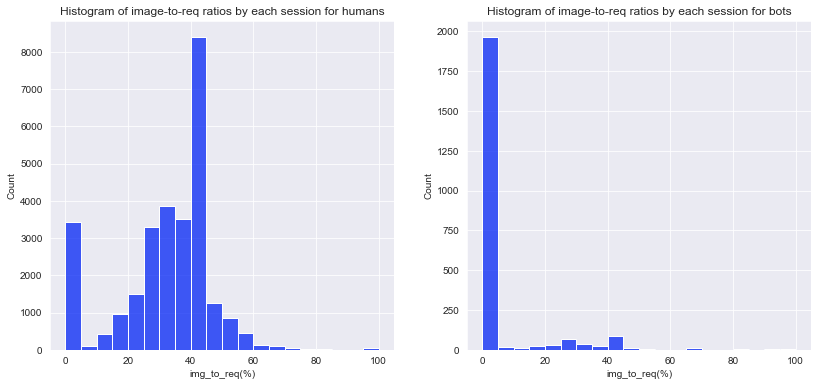

In [41]:
fig, axes = plt.subplots(1,2, figsize=(12,6))
axes = axes.ravel()

sns.histplot(data = temp[temp["is_bot"] == "Human"], x = "img_to_req(%)", bins=20, color="#0324F6", ax=axes[0])
axes[0].set_title("Histogram of image-to-req ratios by each session for humans")

sns.histplot(data = temp[temp["is_bot"] == "Bot"], x = "img_to_req(%)", bins=20, color="#0324F6", ax=axes[1])
axes[1].set_title("Histogram of image-to-req ratios by each session for bots")
fig.tight_layout(pad=3)
plt.show()

#### 4.5. Statistics and histogram for the session duration

In [42]:
user_session.session_duration.describe(percentiles=[0.25, 0.5, 0.75, 0.9, 0.95, 0.99])

count   30683.00
mean        9.02
std        34.28
min         0.00
25%         0.10
50%         0.20
75%         3.99
90%        22.70
95%        41.60
99%       132.08
max       602.98
Name: session_duration, dtype: float64

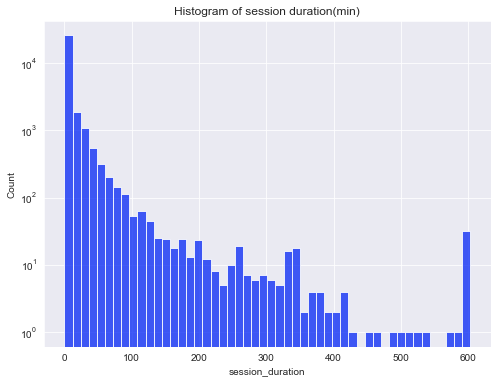

In [43]:
sns.histplot(data = user_session, x = "session_duration", bins=50, color="#0324F6")
plt.title("Histogram of session duration(min)")
plt.yscale("log")
plt.show()

In [44]:
temp.groupby("is_bot")["session_duration"].describe(percentiles=[0.25, 0.5, 0.75, 0.8, 0.9, 0.95, 0.99])

,count,mean,std,min,25%,50%,75%,80%,90%,95%,99%,max
is_bot,,,,,,,,,,,,
Bot,2309.00,48.05,90.30,0.00,3.02,17.60,50.45,63.25,112.09,214.53,597.93,602.98
Human,28374.00,5.84,21.76,0.00,0.10,0.17,2.58,4.64,15.82,29.40,78.14,602.20


In [45]:
# Sessions which their duration are zero (bots)
temp[(temp["session_duration"] == 0) & (temp["is_bot"] == "Bot")]["num_requests"].describe()

count   25.00
mean    11.48
std      4.59
min      6.00
25%      8.00
50%     11.00
75%     13.00
max     22.00
Name: num_requests, dtype: float64

In [46]:
# Sessions which their duration are zero (humans)
temp[(temp["session_duration"] == 0) & (temp["is_bot"] == "Human")]["num_requests"].describe()

count   647.00
mean     11.94
std       4.31
min       6.00
25%       9.00
50%      12.00
75%      14.00
max      43.00
Name: num_requests, dtype: float64

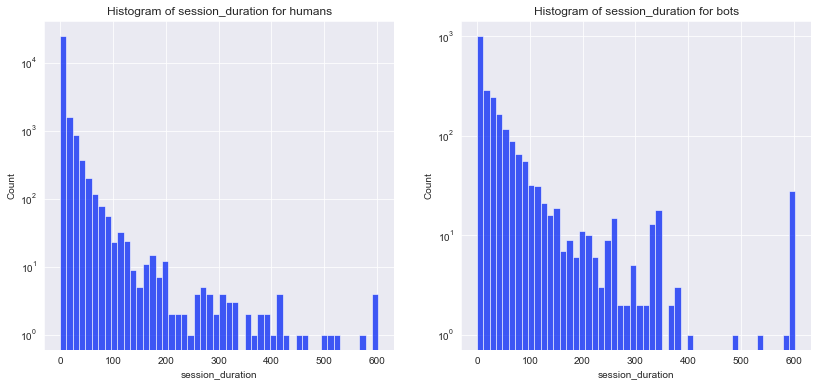

In [47]:
fig, axes = plt.subplots(1,2, figsize=(12,6))
axes = axes.ravel()

sns.histplot(data = temp[temp["is_bot"] == "Human"], x = "session_duration", bins=50, color="#0324F6", ax=axes[0])
axes[0].set_title("Histogram of session_duration for humans")
axes[0].set_yscale('log')
# axes[0].axvline(x=300, color="red",ls = "--")

sns.histplot(data = temp[temp["is_bot"] == "Bot"], x = "session_duration", bins=50, color="#0324F6", ax=axes[1])
axes[1].set_title("Histogram of session_duration for bots")
axes[1].set_yscale('log')
fig.tight_layout(pad=3)
plt.show()

In [48]:
temp[(temp["session_duration"] >= 500)]

,ip,user_agent,session,num_requests,img_to_req(%),4xx(%),Head(%),std_path_length,consq_rep_path(%),ave_response_len,sum_response_len,ave_response_time,sum_response_time,session_duration,ave_time_per_page,robot_txt,is_bot
153,109.165.215.198,FreshpingBot/1.0 (+https://freshping.io/),0,598,0.00,0.00,0.00,0.00,99.83,63360.55,37889610,35.99,21520.00,601.83,1.01,Didn't request,Bot
158,109.39.88.125,FreshpingBot/1.0 (+https://freshping.io/),0,597,0.00,0.00,0.00,0.00,99.83,63360.52,37826231,36.76,21946.00,601.82,1.01,Didn't request,Bot
1779,123.252.16.221,Mozilla/5.0 (compatible; AhrefsBot/7.0; +http://ahrefs.com/robot/),0,1303,0.00,0.15,0.00,0.33,95.47,42514.51,55396404,193.95,252711.00,601.65,0.46,Didn't request,Bot
1801,126.145.72.90,FreshpingBot/1.0 (+https://freshping.io/),0,121,0.00,0.00,0.00,0.00,99.17,63360.62,7666635,37.45,4532.00,600.68,5.01,Didn't request,Bot
1810,126.66.165.254,FreshpingBot/1.0 (+https://freshping.io/),0,598,0.00,0.00,0.00,0.00,99.83,63360.55,37889610,36.68,21936.00,601.85,1.01,Didn't request,Bot
5541,141.68.237.60,MoziIIa/5.0 (X11; Linux x86_64) app_version: 581,0,265,0.00,0.00,0.00,0.83,98.49,134.95,35763,11.18,2964.00,527.92,2.00,Didn't request,Human
6068,148.8.180.196,"Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.77 Safari/537.36",0,392,0.00,0.00,0.00,0.50,99.49,183.42,71901,89137.84,34942035.00,601.12,1.54,Didn't request,Human
6210,153.126.15.177,"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.77 Safari/537.36",0,420,0.00,0.00,0.00,0.50,99.52,182.29,76563,83037.92,34875926.00,600.10,1.43,Didn't request,Human
7084,174.67.91.78,Mozilla/5.0 (compatible; bingbot/2.0; +http://www.bing.com/bingbot.htm),0,239,0.00,0.84,0.00,0.51,87.45,42766.95,10221301,100.33,23978.00,598.52,2.51,Didn't request,Bot
7263,186.236.39.213,Mozilla/5.0+(compatible; UptimeRobot/2.0; http://www.uptimerobot.com/),0,313,0.00,33.55,33.55,0.00,99.36,21052.86,6589544,17.80,5572.00,601.32,1.93,Didn't request,Bot


In [49]:
temp[(temp["session_duration"] >= 300 ) & (temp["is_bot"] == "Human")]

,ip,user_agent,session,num_requests,img_to_req(%),4xx(%),Head(%),std_path_length,consq_rep_path(%),ave_response_len,sum_response_len,ave_response_time,sum_response_time,session_duration,ave_time_per_page,robot_txt,is_bot
3587,14.27.91.23,"Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.77 Safari/537.36",0,894,13.20,0.00,0.00,0.73,97.54,7145.62,6388188,64042.76,57254227.00,358.02,0.40,Didn't request,Human
5541,141.68.237.60,MoziIIa/5.0 (X11; Linux x86_64) app_version: 581,0,265,0.00,0.00,0.00,0.83,98.49,134.95,35763,11.18,2964.00,527.92,2.00,Didn't request,Human
5930,148.208.107.7,"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.101 Safari/537.36",0,4228,2.18,0.17,0.00,0.56,99.50,46564.46,196874533,77237.68,326560928.00,372.57,0.09,Didn't request,Human
5932,148.208.107.7,"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.77 Safari/537.36",1,881,3.52,0.23,0.00,0.58,97.62,51414.07,45295798,91476.17,80590510.00,359.12,0.41,Didn't request,Human
6068,148.8.180.196,"Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.77 Safari/537.36",0,392,0.00,0.00,0.00,0.50,99.49,183.42,71901,89137.84,34942035.00,601.12,1.54,Didn't request,Human
6210,153.126.15.177,"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.77 Safari/537.36",0,420,0.00,0.00,0.00,0.50,99.52,182.29,76563,83037.92,34875926.00,600.10,1.43,Didn't request,Human
7086,179.10.47.145,"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.77 Safari/537.36",0,300,14.33,0.00,0.00,0.69,94.67,19406.90,5822071,62050.75,18615225.00,318.28,1.06,Didn't request,Human
7539,20.216.56.5,"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/90.0.4430.212 Safari/537.36",0,583,1.72,0.17,0.00,0.58,97.94,2355.38,1373188,70950.42,41364097.00,431.10,0.74,Didn't request,Human
7541,20.218.73.209,"Mozilla/5.0 (Windows NT 6.1; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.77 Safari/537.36",0,284,14.08,0.00,0.00,0.73,93.66,16642.48,4726465,67845.02,19267985.00,329.92,1.17,Didn't request,Human
7922,207.204.63.206,"Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/56.0.2924.87 Safari/537.36 Google (+https://developers.google.com/+/web/snippet/)",2,290,78.62,0.00,0.00,0.45,95.52,19908.50,5773465,12.46,3612.00,304.25,1.05,Didn't request,Human


In [50]:
temp[(temp["session_duration"] >= 300 ) & (temp["is_bot"] == "Bot")]

,ip,user_agent,session,num_requests,img_to_req(%),4xx(%),Head(%),std_path_length,consq_rep_path(%),ave_response_len,sum_response_len,ave_response_time,sum_response_time,session_duration,ave_time_per_page,robot_txt,is_bot
153,109.165.215.198,FreshpingBot/1.0 (+https://freshping.io/),0,598,0.00,0.00,0.00,0.00,99.83,63360.55,37889610,35.99,21520.00,601.83,1.01,Didn't request,Bot
158,109.39.88.125,FreshpingBot/1.0 (+https://freshping.io/),0,597,0.00,0.00,0.00,0.00,99.83,63360.52,37826231,36.76,21946.00,601.82,1.01,Didn't request,Bot
1779,123.252.16.221,Mozilla/5.0 (compatible; AhrefsBot/7.0; +http://ahrefs.com/robot/),0,1303,0.00,0.15,0.00,0.33,95.47,42514.51,55396404,193.95,252711.00,601.65,0.46,Didn't request,Bot
1801,126.145.72.90,FreshpingBot/1.0 (+https://freshping.io/),0,121,0.00,0.00,0.00,0.00,99.17,63360.62,7666635,37.45,4532.00,600.68,5.01,Didn't request,Bot
1810,126.66.165.254,FreshpingBot/1.0 (+https://freshping.io/),0,598,0.00,0.00,0.00,0.00,99.83,63360.55,37889610,36.68,21936.00,601.85,1.01,Didn't request,Bot
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29102,79.130.18.189,Mozilla/5.0 (compatible; bingbot/2.0; +http://www.bing.com/bingbot.htm),0,222,0.00,0.00,0.00,0.51,84.23,39446.54,8757132,82.81,18383.00,599.20,2.71,Didn't request,Bot
29103,79.130.18.215,Mozilla/5.0 (compatible; bingbot/2.0; +http://www.bing.com/bingbot.htm),0,254,0.00,0.39,0.00,0.49,85.04,41847.35,10629226,94.54,24014.00,599.72,2.37,Didn't request,Bot
29104,79.130.18.74,Mozilla/5.0 (compatible; bingbot/2.0; +http://www.bing.com/bingbot.htm),0,248,0.00,1.21,0.00,0.51,84.68,40683.19,10089432,99.95,24787.00,589.97,2.39,Didn't request,Bot
29105,79.130.18.86,Mozilla/5.0 (compatible; bingbot/2.0; +http://www.bing.com/bingbot.htm),0,225,1.33,0.44,0.00,0.49,82.67,40432.70,9097358,82.81,18632.00,598.03,2.67,Didn't request,Bot


In [51]:
temp["req_to_duration"] = temp.apply(lambda row: (row["num_requests"]/row["session_duration"]) if row["session_duration"] != 0 else 0, axis=1)

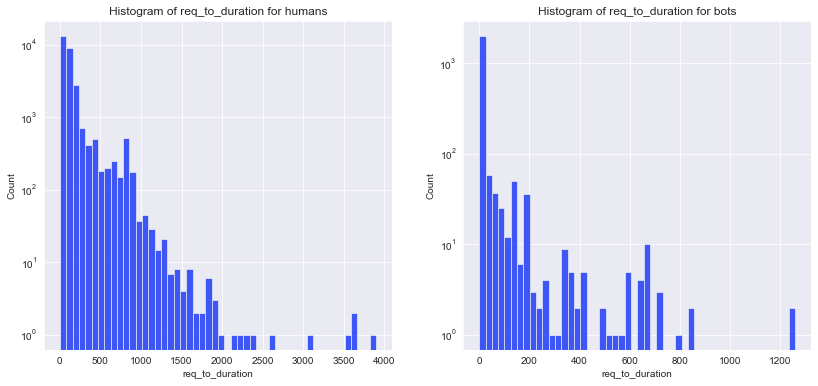

In [52]:
fig, axes = plt.subplots(1,2, figsize=(12,6))
axes = axes.ravel()

sns.histplot(data = temp[temp["is_bot"] == "Human"], x = "req_to_duration", bins=50, color="#0324F6", ax=axes[0])
axes[0].set_title("Histogram of req_to_duration for humans")
axes[0].set_yscale('log')
# axes[0].axvline(x=300, color="red",ls = "--")

sns.histplot(data = temp[temp["is_bot"] == "Bot"], x = "req_to_duration", bins=50, color="#0324F6", ax=axes[1])
axes[1].set_title("Histogram of req_to_duration for bots")
axes[1].set_yscale('log')
fig.tight_layout(pad=3)
plt.show()

#### 4.6. Statistics and histogram for 4xx(%)

In [53]:
user_session["4xx(%)"].describe()

count   30683.00
mean        0.33
std         3.09
min         0.00
25%         0.00
50%         0.00
75%         0.00
max       100.00
Name: 4xx(%), dtype: float64

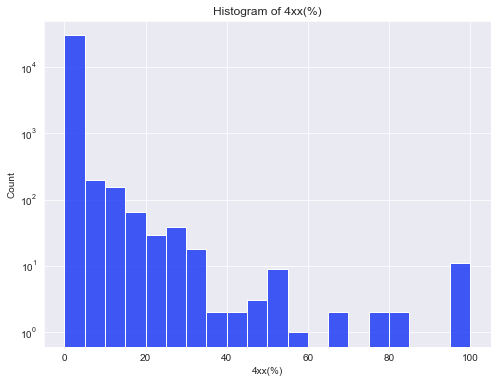

In [54]:
sns.histplot(data = user_session, x = "4xx(%)", bins=20, color="#0324F6")
plt.title("Histogram of 4xx(%)")
plt.yscale("log")
plt.show()

In [55]:
temp.groupby("is_bot")["4xx(%)"].describe(percentiles=[0.25, 0.5, 0.75, 0.8, 0.9, 0.95, 0.99])

,count,mean,std,min,25%,50%,75%,80%,90%,95%,99%,max
is_bot,,,,,,,,,,,,
Bot,2309.00,0.99,6.79,0.00,0.00,0.00,0.00,0.00,0.00,1.52,25.00,100.00
Human,28374.00,0.27,2.56,0.00,0.00,0.00,0.00,0.00,0.00,0.00,9.09,100.00


In [56]:
temp[temp["4xx(%)"] == 100]

,ip,user_agent,session,num_requests,img_to_req(%),4xx(%),Head(%),std_path_length,consq_rep_path(%),ave_response_len,sum_response_len,ave_response_time,sum_response_time,session_duration,ave_time_per_page,robot_txt,is_bot,req_to_duration
24,102.113.30.142,Go-http-client/1.1,0,7,0.00,100.00,0.00,0.00,85.71,0.00,0,8.57,60.00,0.37,0.06,Didn't request,Bot,19.09
6330,153.126.209.239,Go-http-client/1.1,0,35,0.00,100.00,0.00,0.00,97.14,0.00,0,6.29,220.00,1.42,0.04,Didn't request,Bot,24.71
13418,35.124.193.182,Dalvik/2.1.0 (Linux; U; Android 10; SM-A115F Build/QP1A.190711.020),0,60,100.00,100.00,0.00,0.00,98.33,29827.00,1789620,5.27,316.00,10.43,0.18,Didn't request,Human,5.75
13419,35.124.193.182,Dalvik/2.1.0 (Linux; U; Android 10; SM-A115F Build/QP1A.190711.020),1,44,100.00,100.00,0.00,0.00,97.73,29827.00,1312388,6.36,280.00,11.17,0.26,Didn't request,Human,3.94
16552,35.209.184.190,okhttp/2.5.0,0,8,100.00,100.00,0.00,0.00,87.50,29827.00,238616,6.00,48.00,84.58,12.08,Didn't request,Bot,0.09
17838,35.232.97.81,okhttp/2.5.0,0,8,100.00,100.00,0.00,0.00,87.50,29827.00,238616,8.50,68.00,70.00,10.00,Didn't request,Bot,0.11
18027,35.244.120.44,Go-http-client/1.1,0,12,0.00,100.00,0.00,0.00,91.67,0.00,0,7.00,84.00,0.58,0.05,Didn't request,Bot,20.57
18028,35.244.120.44,Go-http-client/1.1,1,6,0.00,100.00,0.00,0.00,83.33,0.00,0,6.67,40.00,3.50,0.70,Didn't request,Bot,1.71
21839,35.82.112.105,Dalvik/2.1.0 (Linux; U; Android 11; SM-A217F Build/RP1A.200720.012),0,6,100.00,100.00,0.00,0.00,83.33,29827.00,178962,6.00,36.00,0.25,0.05,Didn't request,Human,24.00
22618,35.94.243.194,MobileSafari/604.1 CFNetwork/1220.1 Darwin/20.3.0,0,8,100.00,100.00,0.00,0.00,62.50,29827.00,238616,4.50,36.00,0.02,0.00,Didn't request,Human,480.00


In [57]:
temp[(temp["4xx(%)"] == 0) & (temp["is_bot"] == "Bot")]

,ip,user_agent,session,num_requests,img_to_req(%),4xx(%),Head(%),std_path_length,consq_rep_path(%),ave_response_len,sum_response_len,ave_response_time,sum_response_time,session_duration,ave_time_per_page,robot_txt,is_bot,req_to_duration
38,102.221.167.35,okhttp/3.12.1,0,44,0.00,0.00,0.00,0.00,97.73,1767.75,77781,62347.14,2743274.00,25.17,0.59,Didn't request,Bot,1.75
53,102.29.29.19,okhttp/3.12.1,0,20,0.00,0.00,0.00,0.00,95.00,1846.15,36923,45643.00,912860.00,19.35,1.02,Didn't request,Bot,1.03
65,102.57.57.64,"Mozilla/5.0 (iPhone; CPU iPhone OS 13_6 like Mac OS X) AppleWebKit/605.1.15 (KHTML, like Gecko) GSA/161.1.375499464 Mobile/15E148 Safari/604.1",0,21,28.57,0.00,0.00,0.48,66.67,43200.57,907212,15.62,328.00,0.33,0.02,Didn't request,Bot,63.00
77,102.86.124.47,"Mozilla/5.0 (iPhone; CPU iPhone OS 14_5 like Mac OS X) AppleWebKit/605.1.15 (KHTML, like Gecko) GSA/159.1.372414826 Mobile/15E148 Safari/604.1",0,15,40.00,0.00,0.00,0.26,60.00,3453.80,51807,17.07,256.00,0.12,0.01,Didn't request,Bot,128.57
87,102.86.235.57,okhttp/3.12.1,0,9,0.00,0.00,0.00,0.33,66.67,52299.78,470698,31879.89,286919.00,4.48,0.56,Didn't request,Bot,2.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30569,92.239.3.110,okhttp/3.12.1,1,9,0.00,0.00,0.00,0.00,88.89,10149.56,91346,38525.22,346727.00,34.22,4.28,Didn't request,Bot,0.26
30580,92.239.31.204,okhttp/3.12.1,0,10,0.00,0.00,0.00,0.42,70.00,27959.70,279597,64626.20,646262.00,24.58,2.73,Didn't request,Bot,0.41
30594,92.253.144.224,okhttp/3.12.1,0,14,0.00,0.00,0.00,0.00,92.86,23694.21,331719,147985.00,2071790.00,22.45,1.73,Didn't request,Bot,0.62
30604,93.113.99.115,Go-http-client/2.0,0,5976,0.00,0.00,39.91,0.49,99.95,6872.64,41070906,16.00,95602.00,602.60,0.10,Didn't request,Bot,9.92


In [58]:
temp[(temp["4xx(%)"] > 0) & (temp["4xx(%)"] < 100) & (temp["is_bot"] == "Bot")].sort_values(by="4xx(%)", ascending=False)

,ip,user_agent,session,num_requests,img_to_req(%),4xx(%),Head(%),std_path_length,consq_rep_path(%),ave_response_len,sum_response_len,ave_response_time,sum_response_time,session_duration,ave_time_per_page,robot_txt,is_bot,req_to_duration
10235,29.240.244.96,"Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_1) AppleWebKit/601.2.4 (KHTML, like Gecko) Version/9.0.1 Safari/601.2.4 facebookexternalhit/1.1 Facebot Twitterbot/1.0",0,8,100.00,75.00,0.00,0.46,50.00,28253.00,226024,3.00,24.00,0.17,0.02,Didn't request,Bot,48.00
30390,92.232.118.19,"Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_1) AppleWebKit/601.2.4 (KHTML, like Gecko) Version/9.0.1 Safari/601.2.4 facebookexternalhit/1.1 Facebot Twitterbot/1.0",0,8,100.00,75.00,0.00,0.46,50.00,28253.00,226024,5.00,40.00,0.00,0.00,Didn't request,Bot,0.00
9322,226.30.98.220,Mozilla/5.0 (compatible; MJ12bot/v1.4.8; http://mj12bot.com/),0,49,0.00,53.06,0.00,0.50,89.80,30876.69,1512958,66.94,3280.00,1.32,0.03,requested,Bot,37.22
30466,92.239.202.51,"Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_1) AppleWebKit/601.2.4 (KHTML, like Gecko) Version/9.0.1 Safari/601.2.4 facebookexternalhit/1.1 Facebot Twitterbot/1.0",0,12,66.67,50.00,0.00,0.94,50.00,57350.83,688210,18.33,220.00,0.07,0.01,Didn't request,Bot,180.00
2128,127.227.127.114,"Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_1) AppleWebKit/601.2.4 (KHTML, like Gecko) Version/9.0.1 Safari/601.2.4 facebookexternalhit/1.1 Facebot Twitterbot/1.0",0,6,66.67,50.00,0.00,0.98,0.00,46211.00,277266,11.33,68.00,0.02,0.00,Didn't request,Bot,360.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8098,207.213.207.130,"Mozilla/5.0 (Linux; Android 6.0.1; Nexus 5X Build/MMB29P) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.90 Mobile Safari/537.36 (compatible; Googlebot/2.1; +http://www.google.com/bot.html)",0,5252,0.00,0.04,0.00,0.65,97.98,98804.44,518920916,111.81,587223.00,343.42,0.07,Didn't request,Bot,15.29
8093,207.213.207.116,"Mozilla/5.0 (Linux; Android 6.0.1; Nexus 5X Build/MMB29P) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.90 Mobile Safari/537.36 (compatible; Googlebot/2.1; +http://www.google.com/bot.html)",0,6003,0.00,0.02,0.00,0.67,98.23,97074.38,582737510,110.24,661785.00,343.57,0.06,Didn't request,Bot,17.47
7882,20.92.247.146,sentry/21.4.1 (https://sentry.io),0,23912,0.00,0.01,0.00,0.02,99.98,918462.62,21962278192,42.33,1012232.00,599.15,0.03,Didn't request,Bot,39.91
8096,207.213.207.130,Googlebot-Image/1.0,0,21494,5.04,0.00,0.00,0.21,99.93,310.60,6676080,21.32,458280.00,343.40,0.02,Didn't request,Bot,62.59


In [59]:
temp[(temp["4xx(%)"] >= 50) & (temp["is_bot"] == "Human")]

,ip,user_agent,session,num_requests,img_to_req(%),4xx(%),Head(%),std_path_length,consq_rep_path(%),ave_response_len,sum_response_len,ave_response_time,sum_response_time,session_duration,ave_time_per_page,robot_txt,is_bot,req_to_duration
1773,123.184.187.249,Jersey/2.25.1 (HttpUrlConnection 1.8.0_141),0,6,0.00,66.67,0.00,0.00,83.33,19941.00,119646,337.00,2022.00,0.08,0.02,Didn't request,Human,72.00
3341,14.240.166.247,Mozilla/5.0 (Android 5.0.2; Mobile; rv:87.0) Gecko/87.0 Firefox/87.0,0,6,50.00,66.67,0.00,0.00,66.67,12823.33,76940,4.00,24.00,29.88,5.98,Didn't request,Human,0.20
4256,14.9.149.118,MobileSafari/604.1 CFNetwork/1237 Darwin/20.4.0,0,10,100.00,80.00,0.00,0.42,50.00,28567.80,285678,5.60,56.00,6.02,0.67,Didn't request,Human,1.66
13418,35.124.193.182,Dalvik/2.1.0 (Linux; U; Android 10; SM-A115F Build/QP1A.190711.020),0,60,100.00,100.00,0.00,0.00,98.33,29827.00,1789620,5.27,316.00,10.43,0.18,Didn't request,Human,5.75
13419,35.124.193.182,Dalvik/2.1.0 (Linux; U; Android 10; SM-A115F Build/QP1A.190711.020),1,44,100.00,100.00,0.00,0.00,97.73,29827.00,1312388,6.36,280.00,11.17,0.26,Didn't request,Human,3.94
14454,35.132.17.132,"Mozilla/5.0 (Linux; Android 6.0.1; SAMSUNG SM-J700F) AppleWebKit/537.36 (KHTML, like Gecko) SamsungBrowser/14.0 Chrome/87.0.4280.141 Mobile Safari/537.36",0,90,0.00,50.00,0.00,0.50,97.78,144.50,13005,8.84,796.00,7.53,0.08,Didn't request,Human,11.95
14463,35.132.208.164,Mozilla/5.0 (Windows NT 10.0; WOW64; Trident/7.0; rv:11.0) like Gecko,0,13,23.08,53.85,0.00,0.63,38.46,26771.15,348025,15.38,200.00,0.00,0.00,Didn't request,Human,0.00
16422,35.202.53.118,com.google.android.apps.searchlite/444784 (Linux; U; Android 8.1.0; fa_IR; SM-A260G; Build/OPR6; Cronet/90.0.4430.82),0,7,0.00,57.14,0.00,0.00,85.71,24600.29,172202,13.71,96.00,5.40,0.90,Didn't request,Human,1.30
18542,35.251.17.54,MobileSafari/604.1 CFNetwork/1121.2.2 Darwin/19.3.0,0,10,100.00,80.00,0.00,0.42,50.00,26214.70,262147,4.40,44.00,0.05,0.01,Didn't request,Human,200.00
20410,35.47.74.241,MoziIIa/5.0 (X11; Linux x86_64),0,6,0.00,50.00,0.00,1.10,66.67,183.00,1098,5.33,32.00,38.40,7.68,Didn't request,Human,0.16


#### 4.7. Statistics and histogram for Head(%)

In [60]:
user_session["Head(%)"].describe()

count   30683.00
mean        0.02
std         0.82
min         0.00
25%         0.00
50%         0.00
75%         0.00
max        72.97
Name: Head(%), dtype: float64

In [61]:
temp.groupby("is_bot")["Head(%)"].describe(percentiles=[0.25, 0.5, 0.75, 0.8, 0.9, 0.95, 0.99])

,count,mean,std,min,25%,50%,75%,80%,90%,95%,99%,max
is_bot,,,,,,,,,,,,
Bot,2309.00,0.16,2.53,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,45.81
Human,28374.00,0.00,0.46,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,72.97


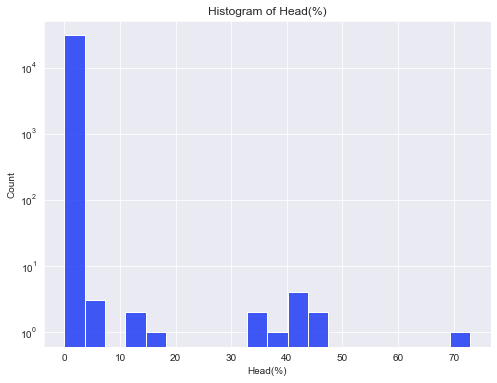

In [62]:
sns.histplot(data = user_session, x = "Head(%)", bins=20, color="#0324F6")
plt.title("Histogram of Head(%)")
plt.yscale("log")
plt.show()

In [63]:
temp[temp["Head(%)"] > 20]

,ip,user_agent,session,num_requests,img_to_req(%),4xx(%),Head(%),std_path_length,consq_rep_path(%),ave_response_len,sum_response_len,ave_response_time,sum_response_time,session_duration,ave_time_per_page,robot_txt,is_bot,req_to_duration
7263,186.236.39.213,Mozilla/5.0+(compatible; UptimeRobot/2.0; http://www.uptimerobot.com/),0,313,0.00,33.55,33.55,0.00,99.36,21052.86,6589544,17.80,5572.00,601.32,1.93,Didn't request,Bot,0.52
7345,20.116.215.189,Go-http-client/2.0,0,6401,0.00,0.00,41.70,0.49,99.95,6537.99,41849705,16.25,103996.00,602.85,0.09,Didn't request,Bot,10.62
7346,20.117.146.75,Go-http-client/2.0,0,6067,0.00,0.00,40.17,0.49,99.95,6817.45,41361477,15.97,96864.00,602.90,0.10,Didn't request,Bot,10.06
7457,20.163.161.41,"Mozilla/5.0 (iPhone; CPU iPhone OS 7_0 like Mac OS X; en-us) AppleWebKit/537.51.1 (KHTML, like Gecko) Version/7.0 Mobile/11A465 Safari/9537.53",0,37,35.14,0.00,72.97,0.54,70.27,35405.38,1309999,176.00,6512.00,0.12,0.00,Didn't request,Human,317.14
7883,20.92.247.170,Go-http-client/2.0,0,7273,0.00,0.00,42.33,0.48,99.96,6987.06,50816897,16.68,121283.00,602.97,0.08,Didn't request,Bot,12.06
11473,35.109.94.99,"Mozilla/5.0 (iPhone; CPU iPhone OS 10_2 like Mac OS X) AppleWebKit/602.1.50 (KHTML, like Gecko) GSA/68.0.234683655 Mobile/14C92 Safari/602.1",0,6,0.00,0.00,33.33,1.37,33.33,1633.33,9800,9.33,56.00,6.17,1.23,requested,Bot,0.97
23145,36.67.23.210,Go-http-client/2.0,0,7582,0.00,1.61,45.81,0.48,99.96,6608.46,50105314,16.83,127634.00,602.98,0.08,Didn't request,Bot,12.57
26529,60.148.0.167,Go-http-client/2.0,0,7351,0.00,1.71,43.98,0.48,99.96,6801.00,49994185,16.42,120695.00,602.80,0.08,Didn't request,Bot,12.19
28971,76.212.164.3,Go-http-client/2.0,0,6549,0.00,1.88,42.11,0.49,99.95,6429.00,42103527,16.32,106849.00,602.97,0.09,Didn't request,Bot,10.86
30604,93.113.99.115,Go-http-client/2.0,0,5976,0.00,0.00,39.91,0.49,99.95,6872.64,41070906,16.00,95602.00,602.60,0.10,Didn't request,Bot,9.92


In [64]:
temp[(temp["Head(%)"] > 0) & (temp["is_bot"] == "Human")]

,ip,user_agent,session,num_requests,img_to_req(%),4xx(%),Head(%),std_path_length,consq_rep_path(%),ave_response_len,sum_response_len,ave_response_time,sum_response_time,session_duration,ave_time_per_page,robot_txt,is_bot,req_to_duration
7457,20.163.161.41,"Mozilla/5.0 (iPhone; CPU iPhone OS 7_0 like Mac OS X; en-us) AppleWebKit/537.51.1 (KHTML, like Gecko) Version/7.0 Mobile/11A465 Safari/9537.53",0,37,35.14,0.00,72.97,0.54,70.27,35405.38,1309999,176.00,6512.00,0.12,0.00,Didn't request,Human,317.14
8161,207.213.71.102,"Mozilla/5.0 (Linux; Android 4.2.1; en-us; Nexus 5 Build/JOP40D) AppleWebKit/535.19 (KHTML, like Gecko; googleweblight) Chrome/38.0.1025.166 Mobile Safari/535.19",1,15,26.67,0.00,13.33,0.51,46.67,69885.33,1048280,12.53,188.00,0.63,0.05,Didn't request,Human,23.68
8170,207.213.71.116,"Mozilla/5.0 (Linux; Android 4.2.1; en-us; Nexus 5 Build/JOP40D) AppleWebKit/535.19 (KHTML, like Gecko; googleweblight) Chrome/38.0.1025.166 Mobile Safari/535.19",2,18,22.22,0.00,5.56,0.49,55.56,13508.72,243157,14.00,252.00,2.60,0.15,Didn't request,Human,6.92
8180,207.213.71.130,"Mozilla/5.0 (Linux; Android 4.2.1; en-us; Nexus 5 Build/JOP40D) AppleWebKit/535.19 (KHTML, like Gecko; googleweblight) Chrome/38.0.1025.166 Mobile Safari/535.19",6,22,22.73,0.00,4.55,0.50,63.64,40650.23,894305,16.00,352.00,23.40,1.11,Didn't request,Human,0.94
8181,207.213.71.130,"Mozilla/5.0 (Linux; Android 4.2.1; en-us; Nexus 5 Build/JOP40D) AppleWebKit/535.19 (KHTML, like Gecko; googleweblight) Chrome/38.0.1025.166 Mobile Safari/535.19",7,33,12.12,0.00,3.03,0.56,75.76,39304.03,1297033,21.58,712.00,36.67,1.15,Didn't request,Human,0.90
29114,8.110.230.133,"Mozilla/5.0 (Linux; Android 4.2.1; en-us; Nexus 5 Build/JOP40D) AppleWebKit/535.19 (KHTML, like Gecko; googleweblight) Chrome/38.0.1025.166 Mobile Safari/535.19",1,9,33.33,11.11,11.11,0.00,44.44,20954.00,188586,8.44,76.00,2.40,0.30,Didn't request,Human,3.75
29119,8.110.230.161,"Mozilla/5.0 (Linux; Android 4.2.1; en-us; Nexus 5 Build/JOP40D) AppleWebKit/535.19 (KHTML, like Gecko; googleweblight) Chrome/38.0.1025.166 Mobile Safari/535.19",1,6,33.33,0.00,16.67,0.41,33.33,35966.17,215797,12.00,72.00,2.42,0.48,Didn't request,Human,2.48


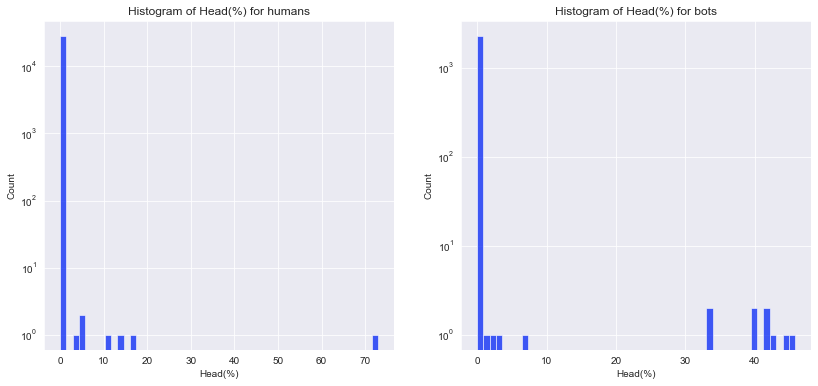

In [65]:
fig, axes = plt.subplots(1,2, figsize=(12,6))
axes = axes.ravel()

sns.histplot(data = temp[temp["is_bot"] == "Human"], x = "Head(%)", bins=50, color="#0324F6", ax=axes[0])
axes[0].set_title("Histogram of Head(%) for humans")
axes[0].set_yscale('log')
# axes[0].axvline(x=300, color="red",ls = "--")

sns.histplot(data = temp[temp["is_bot"] == "Bot"], x = "Head(%)", bins=50, color="#0324F6", ax=axes[1])
axes[1].set_title("Histogram of Head(%) for bots")
axes[1].set_yscale('log')
fig.tight_layout(pad=3)
plt.show()

#### 4.8. Statistics and histogram for std_path_length

In [66]:
user_session["std_path_length"].describe()

count   30683.00
mean        0.39
std         0.21
min         0.00
25%         0.26
50%         0.30
75%         0.56
max         2.15
Name: std_path_length, dtype: float64

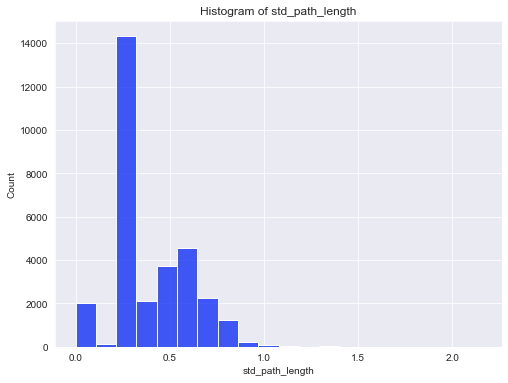

In [67]:
sns.histplot(data = user_session, x = "std_path_length", bins=20, color="#0324F6")
plt.title("Histogram of std_path_length")
plt.show()

In [68]:
temp.groupby("is_bot")["std_path_length"].describe(percentiles=[0.25, 0.5, 0.75, 0.8, 0.9, 0.95, 0.99])

,count,mean,std,min,25%,50%,75%,80%,90%,95%,99%,max
is_bot,,,,,,,,,,,,
Bot,2309.00,0.31,0.23,0.00,0.00,0.36,0.49,0.52,0.53,0.61,0.82,2.15
Human,28374.00,0.40,0.20,0.00,0.26,0.29,0.57,0.61,0.68,0.77,0.87,1.64


In [69]:
temp[temp["std_path_length"] > 0.8]["is_bot"].value_counts()

Human    991
Bot       29
Name: is_bot, dtype: int64

#### 4.9. Statistics and histogram for consq_rep_path(%)

In [70]:
user_session["consq_rep_path(%)"].describe()

count   30683.00
mean       64.99
std        14.42
min         0.00
25%        57.14
50%        62.50
75%        75.00
max        99.98
Name: consq_rep_path(%), dtype: float64

In [71]:
temp.groupby("is_bot")["consq_rep_path(%)"].describe()

,count,mean,std,min,25%,50%,75%,max
is_bot,,,,,,,,
Bot,2309.00,76.99,16.80,0.00,66.67,81.82,88.89,99.98
Human,28374.00,64.02,13.76,0.00,57.14,62.50,73.15,99.76


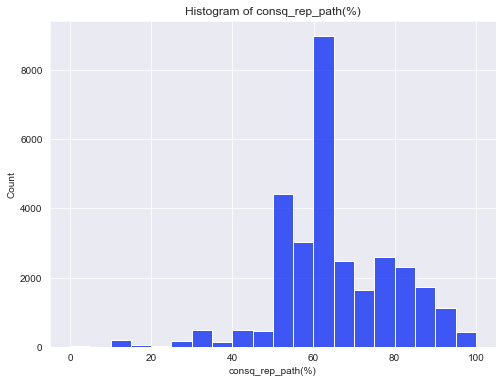

In [72]:
sns.histplot(data = user_session, x = "consq_rep_path(%)", bins=20, color="#0324F6")
plt.title("Histogram of consq_rep_path(%)")
plt.show()

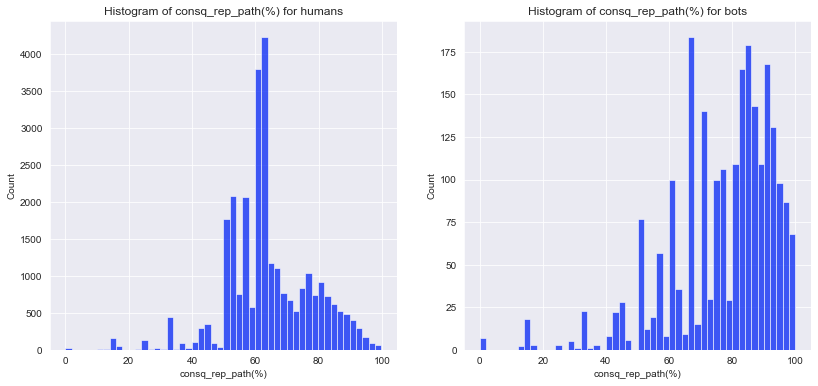

In [73]:
fig, axes = plt.subplots(1,2, figsize=(12,6))
axes = axes.ravel()

sns.histplot(data = temp[temp["is_bot"] == "Human"], x = "consq_rep_path(%)", bins=50, color="#0324F6", ax=axes[0])
axes[0].set_title("Histogram of consq_rep_path(%) for humans")
# axes[0].set_yscale('log')
# axes[0].axvline(x=300, color="red",ls = "--")

sns.histplot(data = temp[temp["is_bot"] == "Bot"], x = "consq_rep_path(%)", bins=50, color="#0324F6", ax=axes[1])
axes[1].set_title("Histogram of consq_rep_path(%) for bots")
# axes[1].set_yscale('log')
fig.tight_layout(pad=3)
plt.show()

#### 4.10. Statistics and histogram for ave_time_per_page

In [74]:
user_session["ave_time_per_page"].describe()

count   30683.00
mean        0.45
std         1.38
min         0.00
25%         0.01
50%         0.01
75%         0.12
max        19.64
Name: ave_time_per_page, dtype: float64

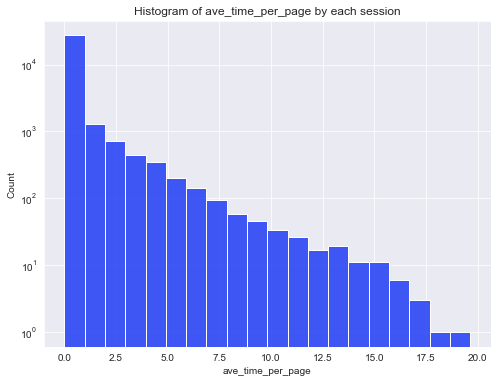

In [75]:
sns.histplot(data = temp, x = "ave_time_per_page", bins=20, color="#0324F6")
plt.title("Histogram of ave_time_per_page by each session")
plt.yscale("log")
plt.show()

In [76]:
temp.groupby("is_bot")["ave_time_per_page"].describe()

,count,mean,std,min,25%,50%,75%,max
is_bot,,,,,,,,
Bot,2309.00,2.65,3.36,0.00,0.23,1.17,4.11,19.64
Human,28374.00,0.27,0.85,0.00,0.01,0.01,0.07,13.11


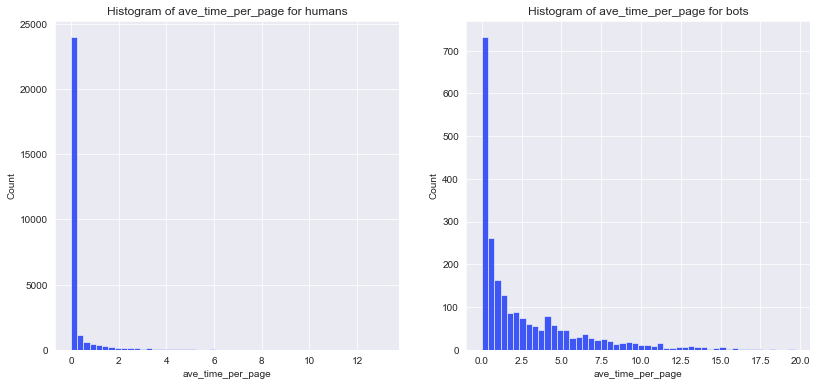

In [77]:
fig, axes = plt.subplots(1,2, figsize=(12,6))
axes = axes.ravel()

sns.histplot(data = temp[temp["is_bot"] == "Human"], x = "ave_time_per_page", bins=50, color="#0324F6", ax=axes[0])
axes[0].set_title("Histogram of ave_time_per_page for humans")
# axes[0].set_yscale('log')
# axes[0].axvline(x=300, color="red",ls = "--")

sns.histplot(data = temp[temp["is_bot"] == "Bot"], x = "ave_time_per_page", bins=50, color="#0324F6", ax=axes[1])
axes[1].set_title("Histogram of ave_time_per_page for bots")
# axes[1].set_yscale('log')
fig.tight_layout(pad=3)
plt.show()

#### 4.11. Statistics and histogram for ave_response_len

In [78]:
user_session["ave_response_len"].describe()

count     30683.00
mean      31845.42
std       91341.98
min           0.00
25%        4174.23
50%       29547.79
75%       50229.94
max     9709611.67
Name: ave_response_len, dtype: float64

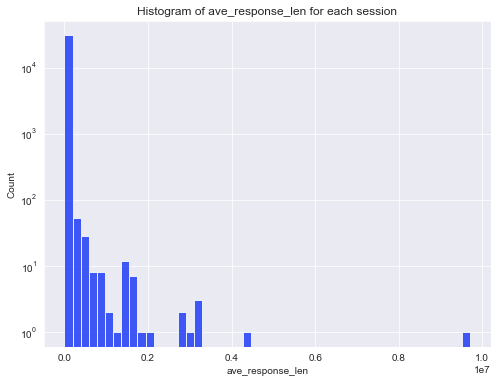

In [79]:
sns.histplot(data = temp, x = "ave_response_len", bins=50, color="#0324F6")
plt.title("Histogram of ave_response_len for each session")
plt.yscale("log")
plt.show()

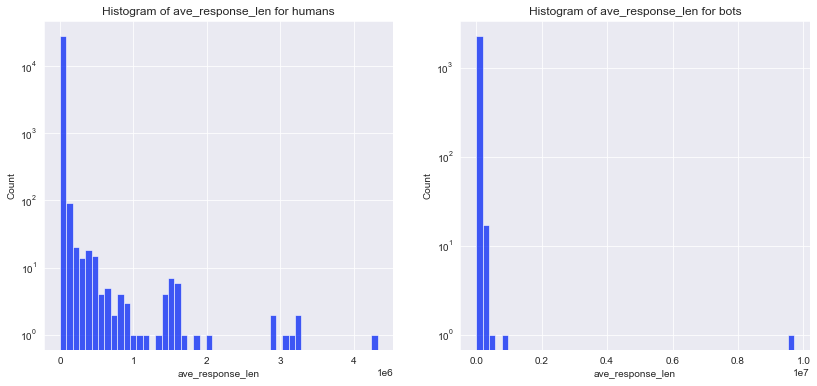

In [80]:
fig, axes = plt.subplots(1,2, figsize=(12,6))
axes = axes.ravel()

sns.histplot(data = temp[temp["is_bot"] == "Human"], x = "ave_response_len", bins=50, color="#0324F6", ax=axes[0])
axes[0].set_title("Histogram of ave_response_len for humans")
axes[0].set_yscale('log')
# axes[0].axvline(x=300, color="red",ls = "--")

sns.histplot(data = temp[temp["is_bot"] == "Bot"], x = "ave_response_len", bins=50, color="#0324F6", ax=axes[1])
axes[1].set_title("Histogram of ave_response_len for bots")
axes[1].set_yscale('log')
fig.tight_layout(pad=3)
plt.show()

#### 4.12. Statistics and histogram for ave_response_time

In [81]:
user_session["ave_response_time"].describe()

count    30683.00
mean      5048.34
std      21047.66
min          0.80
25%          7.75
50%         11.71
75%        267.62
max     810834.00
Name: ave_response_time, dtype: float64

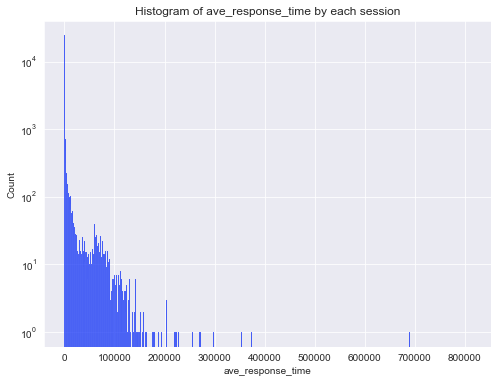

In [82]:
sns.histplot(data = temp, x = "ave_response_time", bins=1000, color="#0324F6")
plt.title("Histogram of ave_response_time by each session")
plt.yscale("log")
plt.show()

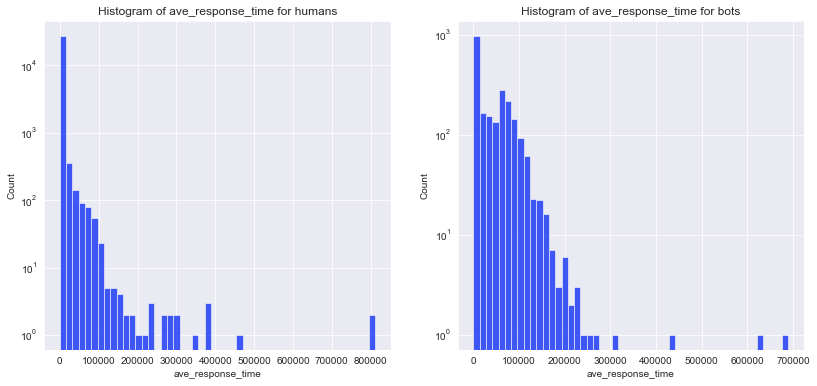

In [83]:
fig, axes = plt.subplots(1,2, figsize=(12,6))
axes = axes.ravel()

sns.histplot(data = temp[temp["is_bot"] == "Human"], x = "ave_response_time", bins=50, color="#0324F6", ax=axes[0])
axes[0].set_title("Histogram of ave_response_time for humans")
axes[0].set_yscale('log')
# axes[0].axvline(x=300, color="red",ls = "--")

sns.histplot(data = temp[temp["is_bot"] == "Bot"], x = "ave_response_time", bins=50, color="#0324F6", ax=axes[1])
axes[1].set_title("Histogram of ave_response_time for bots")
axes[1].set_yscale('log')
fig.tight_layout(pad=3)
plt.show()

### 5. PCA analysis

In [84]:
scaled_df = user_session.copy()
scaler = StandardScaler()
scaled_df = scaler.fit_transform(scaled_df)

In [85]:
pca_2d = PCA(n_components=2)
reduced_pca_2d = pca_2d.fit_transform(scaled_df)
df_pca = pd.DataFrame({"PCA_1": reduced_pca_2d[:,0], "PCA_2": reduced_pca_2d[:,1]})

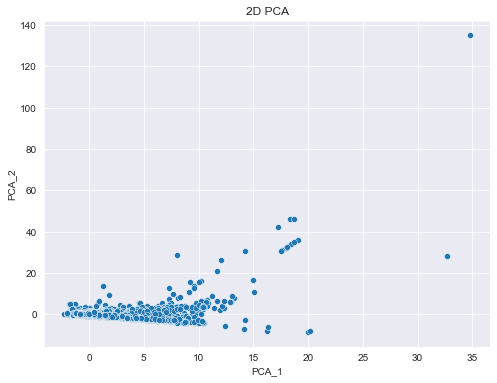

In [86]:
plt.figure(figsize=(8,6))

sns.scatterplot(x=df_pca["PCA_1"], y=df_pca["PCA_2"])

plt.title("2D PCA")

# plt.axhline(y=4, color='black', ls = "--")
# plt.axvline(x=9, color="black",ls = "--")
plt.show()

In [87]:
index_of_greater_10 = df_pca[df_pca["PCA_1"] > 10].index

In [88]:
temp_2d_pca = temp.iloc[index_of_greater_10,:]
temp_2d_pca.reset_index(inplace=True)
print(temp_2d_pca.shape)
temp_2d_pca.head()

(70, 19)


,index,ip,user_agent,session,num_requests,img_to_req(%),4xx(%),Head(%),std_path_length,consq_rep_path(%),ave_response_len,sum_response_len,ave_response_time,sum_response_time,session_duration,ave_time_per_page,robot_txt,is_bot,req_to_duration
0,9,102.105.139.132,"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.77 Safari/537.36",0,1686,3.97,0.06,0.00,0.63,98.58,8796.01,14830072,75446.08,127202088.00,234.97,0.14,Didn't request,Human,7.18
1,153,109.165.215.198,FreshpingBot/1.0 (+https://freshping.io/),0,598,0.00,0.00,0.00,0.00,99.83,63360.55,37889610,35.99,21520.00,601.83,1.01,Didn't request,Bot,0.99
2,158,109.39.88.125,FreshpingBot/1.0 (+https://freshping.io/),0,597,0.00,0.00,0.00,0.00,99.83,63360.52,37826231,36.76,21946.00,601.82,1.01,Didn't request,Bot,0.99
3,831,113.118.8.165,okhttp/3.12.1,0,6,0.00,0.00,0.00,0.00,83.33,8814.33,52886,66841.67,401050.00,92.23,18.45,Didn't request,Bot,0.07
4,1779,123.252.16.221,Mozilla/5.0 (compatible; AhrefsBot/7.0; +http://ahrefs.com/robot/),0,1303,0.00,0.15,0.00,0.33,95.47,42514.51,55396404,193.95,252711.00,601.65,0.46,Didn't request,Bot,2.17


In [89]:
index_of_pca1_smaller_10 = df_pca[df_pca["PCA_1"] < 10].index
index_of_pca2_greater_5 = df_pca[df_pca["PCA_2"] > 5].index

In [90]:
temp_2d_pca = temp.iloc[index_of_pca1_smaller_10,:]
temp_2d_pca = temp_2d_pca.iloc[index_of_pca2_greater_5,:]
temp_2d_pca.reset_index(inplace=True)
print(temp_2d_pca.shape)
temp_2d_pca.head()

(55, 19)


,index,ip,user_agent,session,num_requests,img_to_req(%),4xx(%),Head(%),std_path_length,consq_rep_path(%),ave_response_len,sum_response_len,ave_response_time,sum_response_time,session_duration,ave_time_per_page,robot_txt,is_bot,req_to_duration
0,10,102.105.179.61,"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.77 Safari/537.36",0,42,35.71,0.00,0.00,0.67,66.67,46781.36,1964817,2210.90,92858.00,1.63,0.04,Didn't request,Human,25.71
1,1784,123.252.23.50,Mozilla/5.0 (compatible; AhrefsBot/7.0; +http://ahrefs.com/robot/),0,6,0.00,0.00,0.00,0.41,66.67,39682.33,238094,174.67,1048.00,70.45,14.09,Didn't request,Bot,0.09
2,3204,14.226.186.172,MoziIIa/5.0 (X11; Linux x86_64) app_version: 581,0,12,0.00,0.00,0.00,0.00,83.33,286.50,3438,12.33,148.00,32.15,2.92,Didn't request,Human,0.37
3,3595,14.34.107.206,"Mozilla/5.0 (Linux; Android 7.1.1; SAMSUNG SM-J250F) AppleWebKit/537.36 (KHTML, like Gecko) SamsungBrowser/14.0 Chrome/87.0.4280.141 Mobile Safari/537.36",0,61,16.39,0.00,0.00,0.51,77.05,25402.39,1549546,13349.98,814349.00,13.73,0.23,Didn't request,Human,4.44
4,5943,148.208.20.191,"Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.77 Safari/537.36",0,31,32.26,0.00,0.00,0.50,77.42,35957.77,1114691,13.55,420.00,0.48,0.02,Didn't request,Human,64.14


In [91]:
# user_session.to_csv("../input/features.csv", index=True)